In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df_old = pd.read_csv('hfi_cc_2018.csv')

In [3]:
df_old.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [4]:
#drop all the other columns that are not necessary in this analysis.
df_new = df_old[['year', 'ISO_code', 'countries', 'region','pf_ss_women_fgm', 'pf_ss_women_missing', 'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women',\
                      'pf_movement_women', 'pf_identity_parental_marriage', 'ef_trade_tariffs_revenue', \
                      'ef_trade_tariffs_mean', 'ef_trade', 'ef_trade_tariffs_revenue', 'ef_government_tax_income',\
                      'ef_trade_regulatory_compliance']]

In [5]:
df_new.shape
type(df_new)

pandas.core.frame.DataFrame

In [6]:
# drop all of the roles that are missing values in any of these columns. 
df_new = df_new.dropna()
df_new.shape

(810, 18)

In [7]:
# sort the rows by countries and year, and then set the index value as countries. 
df_new_structured = df_new.sort_values(['countries', 'year']).set_index(['countries'])
df_new_structured

,year,ISO_code,region,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women,pf_identity_parental_marriage,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade,ef_trade_tariffs_revenue,ef_government_tax_income,ef_trade_regulatory_compliance
countries,,,,,,,,,,,,,,,,,
Albania,2011,ALB,Eastern Europe,10.0,7.5,10.0,5.0,7.5,8.333333,5.0,10.0,8.572230,9.00,7.118943,8.572230,10.0,7.447591
Albania,2012,ALB,Eastern Europe,10.0,7.5,10.0,5.0,7.5,8.333333,5.0,10.0,9.613333,9.24,7.115422,9.613333,10.0,7.447591
Albania,2013,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.640000,9.24,7.705771,9.640000,10.0,7.447591
Albania,2014,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.640000,9.24,8.232519,9.640000,9.0,9.223081
Albania,2015,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.353333,9.24,8.112452,9.353333,9.0,9.405328
Albania,2016,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.626667,9.24,8.214900,9.626667,9.0,9.405328
Algeria,2011,DZA,Middle East & North Africa,10.0,7.5,5.0,5.0,5.0,7.500000,0.0,0.0,8.480000,6.28,5.689695,8.480000,7.0,7.053281
Algeria,2012,DZA,Middle East & North Africa,10.0,7.5,5.0,5.0,5.0,7.500000,0.0,0.0,8.480000,6.28,5.306788,8.480000,7.0,7.053281
Algeria,2013,DZA,Middle East & North Africa,10.0,7.5,0.0,0.0,0.0,5.833333,5.0,0.0,8.480000,6.28,4.895672,8.480000,7.0,7.115725


In [8]:
#separate data by year. 
df_2011 = df_new_structured.loc[df_new_structured['year'] == 2011]
df_2012 = df_new_structured.loc[df_new_structured['year'] == 2012]
df_2013 = df_new_structured.loc[df_new_structured['year'] == 2013]
df_2014 = df_new_structured.loc[df_new_structured['year'] == 2014]
df_2015 = df_new_structured.loc[df_new_structured['year'] == 2015]
df_2016 = df_new_structured.loc[df_new_structured['year'] == 2016]

In [9]:
# plot line graphs for each year, overlaying them. 
ddf_2011 = df_2011.describe().loc['mean']
ddf_2012 = df_2012.describe().loc['mean']
ddf_2013 = df_2013.describe().loc['mean']
ddf_2014 = df_2014.describe().loc['mean']
ddf_2015 = df_2015.describe().loc['mean']
ddf_2016 = df_2016.describe().loc['mean']

lst_of_columns = ['year', 'ISO_code', 'countries', 'region','pf_ss_women_fgm', 'pf_ss_women_missing',\
                  'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women',\
                      'pf_movement_women', 'pf_identity_parental_marriage', 'ef_trade_tariffs_revenue', \
                      'ef_trade_tariffs_mean', 'ef_trade', 'ef_trade_tariffs_revenue', 'ef_government_tax_income',\
                      'ef_trade_regulatory_compliance']
mean_frames = [ddf_2011, ddf_2012, ddf_2013, ddf_2014, ddf_2015, ddf_2016]
mean_merged = pd.concat(mean_frames, axis = 1).transpose().set_index('year')

a = []
for each in mean_merged.index: 
    a.append(str(each))

mean_merged['whole_year'] = a



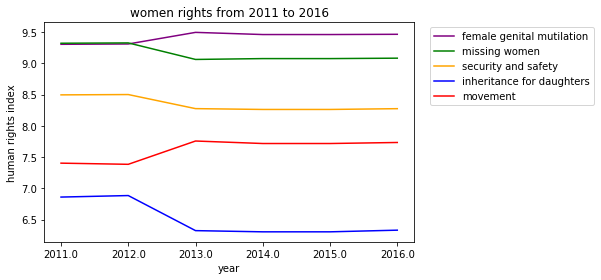

In [10]:
fig1, ax1 = plt.subplots()
plt.xlabel('year')
plt.ylabel('human rights index')
plt.title('women rights from 2011 to 2016')
fgm = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_fgm, color = 'purple')
missing = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_missing, color = 'g')
ss = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women, color = 'orange')
inheritance = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_inheritance_daughters, color = 'blue')
mvmnt = plt.plot(mean_merged.whole_year, mean_merged.pf_movement_women, color = 'red')
leg1 = plt.legend(('female genital mutilation','missing women', 'security and safety', 'inheritance for daughters', 'movement'))
fig1.tight_layout()
bb1 = leg1.get_bbox_to_anchor().inverse_transformed(ax1.transAxes)
xOffset = 0.5
bb1.x0 += xOffset
bb1.x1 += xOffset
leg1.set_bbox_to_anchor(bb1, transform = ax1.transAxes)
plt.savefig('WomenRightsByYear.png', bbox_extra_artists = (leg1, ), bbox_inches = 'tight')

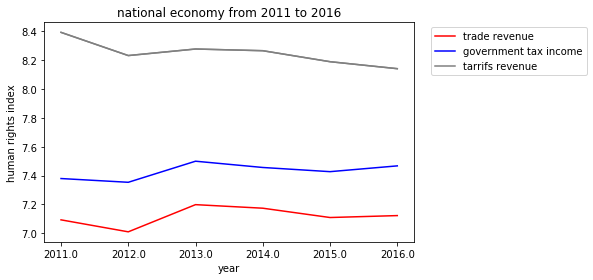

In [11]:
fig2, ax2 = plt.subplots()
plt.xlabel('year')
plt.ylabel('human rights index')
plt.title('national economy from 2011 to 2016')

plt_trade = plt.plot(mean_merged.whole_year, mean_merged.ef_trade, color = 'red')
plt_tax = plt.plot(mean_merged.whole_year, mean_merged.ef_government_tax_income, color = 'blue')
plt_tarrifs_revenue = plt.plot(mean_merged.whole_year, mean_merged.ef_trade_tariffs_revenue, color = 'grey' )

leg2 = ax2.legend(('trade revenue','government tax income','tarrifs revenue',))
fig2.tight_layout()
bb2 = leg2.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
xOffset2 = 0.48
bb2.x0 += xOffset2
bb2.x1 += xOffset2
leg2.set_bbox_to_anchor(bb2, transform = ax2.transAxes)
plt.savefig('YearByEconomy.png', bbox_extra_artists = (leg2, ), bbox_inches = 'tight')

In [12]:
import seaborn as sns
corr2011 = df_2011.corr()
corr2011 = corr2011.drop('year')
corr2011 = corr2011.drop('year', axis = 1)
#sns.heatmap(corr2011,
           #xticklabels = corr2011.columns.values,
           #yticklabels = corr2011.columns.values,)

In [13]:
corr2012 = df_2012.corr()
corr2012 = corr2012.drop('year')
corr2012 = corr2012.drop('year', axis = 1)
corr2012 = corr2012.drop_duplicates().transpose().drop_duplicates().transpose()

In [14]:
corr2013 = df_2013.corr()
corr2013 = corr2013.drop('year')
corr2013 = corr2013.drop('year', axis = 1)
corr2013 = corr2013.drop_duplicates().transpose().drop_duplicates().transpose()

In [15]:
corr2014 = df_2014.corr()
corr2014 = corr2014.drop('year')
corr2014 = corr2014.drop('year', axis = 1)
corr2014 = corr2014.drop_duplicates().transpose().drop_duplicates().transpose()

In [16]:
corr2015 = df_2015.corr()
corr2015 = corr2015.drop('year')
corr2015 = corr2015.drop('year', axis = 1)
corr2015 = corr2015.drop_duplicates().transpose().drop_duplicates().transpose()

In [17]:
corr2016 = df_2016.corr()
corr2016 = corr2016.drop('year')
corr2016 = corr2016.drop('year', axis = 1)
corr2016 = corr2016.drop_duplicates().transpose().drop_duplicates().transpose()

In [18]:
S_corr_2011 = corr2011['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2012 = corr2012['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2013 = corr2013['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2014 = corr2014['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2015 = corr2015['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2016 = corr2016['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
lst_columns = ['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']
lst_corr = [S_corr_2011, S_corr_2012, S_corr_2013, S_corr_2014, S_corr_2015, S_corr_2016]
corr_df_tarriffs = pd.concat(lst_corr, axis = 1, join = 'inner').drop_duplicates().transpose()
corr_df_tarriffs['year'] = ['2011', '2012', '2013', '2014', '2015', '2016']

corr_df_tarriffs = corr_df_tarriffs.set_index('year')
corr_df_tarriffs

,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women
year,,,,,,
2011,0.308441,0.474401,0.419509,0.459867,0.422432,0.399558
2012,0.308689,0.469281,0.422955,0.459809,0.424069,0.382804
2013,0.323013,0.348652,0.416278,0.388769,0.457415,0.327609
2014,0.323581,0.359604,0.426746,0.399649,0.467641,0.324413
2015,0.323675,0.371514,0.438083,0.411466,0.483727,0.340580
2016,0.348466,0.377888,0.429525,0.410312,0.492857,0.327884


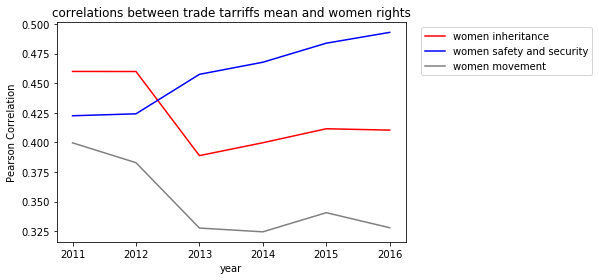

In [19]:
fig3, ax3 = plt.subplots()
plt.xlabel('year')
plt.ylabel('Pearson Correlation')
plt.title('correlations between trade tarriffs mean and women rights')

plt_corr_inheritance = plt.plot(corr_df_tarriffs.index, corr_df_tarriffs.pf_ss_women_inheritance, color = 'red')
plt_corr_ss = plt.plot(corr_df_tarriffs.index, corr_df_tarriffs.pf_ss_women, color = 'blue')
plt_corr_mvmnt = plt.plot(corr_df_tarriffs.index, corr_df_tarriffs.pf_movement_women, color = 'grey' )

leg3 = ax3.legend(('women inheritance','women safety and security','women movement',))
fig3.tight_layout()
bb3 = leg3.get_bbox_to_anchor().inverse_transformed(ax3.transAxes)
xOffset3 = 0.55
bb3.x0 += xOffset3
bb3.x1 += xOffset3
leg3.set_bbox_to_anchor(bb3, transform = ax3.transAxes)
plt.savefig('CorrTarriffWomen.png', bbox_extra_artists = (leg3, ), bbox_inches = 'tight')

In [20]:
df_old.loc[642, 'pf_movement_women']

10.0

In [21]:
S_corr_2011_1 = corr2011['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2012_1 = corr2012['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2013_1 = corr2013['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2014_1 = corr2014['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2015_1 = corr2015['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2016_1 = corr2016['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]

lst_corr_1 = [S_corr_2011_1, S_corr_2012_1, S_corr_2013_1, S_corr_2014_1, S_corr_2015_1, S_corr_2016_1]
corr_df_tarriffs_rev = pd.concat(lst_corr_1, axis = 1).drop_duplicates().transpose().drop_duplicates()
corr_df_tarriffs_rev['year'] = ['2011', '2012', '2013', '2014', '2015', '2016']

corr_df_tarriffs_rev = corr_df_tarriffs_rev.set_index('year')
corr_df_tarriffs_rev

,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women
year,,,,,,
2011,0.263493,0.297458,0.315880,0.315731,0.284564,0.246932
2012,0.209932,0.267914,0.274600,0.279724,0.237569,0.265291
2013,0.186314,0.238708,0.172603,0.209144,0.235882,0.168530
2014,0.208804,0.273776,0.212157,0.247062,0.283787,0.210319
2015,0.200182,0.214581,0.143239,0.181950,0.218864,0.164239
2016,0.189873,0.205252,0.136049,0.173532,0.207210,0.165172


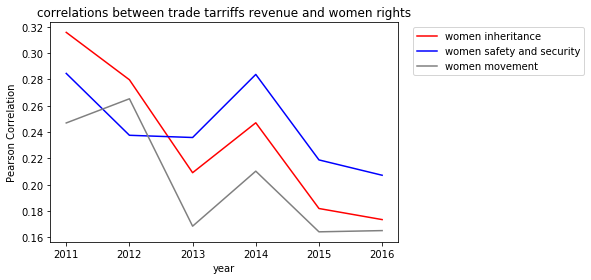

In [23]:
fig4, ax4 = plt.subplots()
plt.xlabel('year')
plt.ylabel('Pearson Correlation')
plt.title('correlations between trade tarriffs revenue and women rights')

plt_corr_inheritance = plt.plot(corr_df_tarriffs_rev.index, corr_df_tarriffs_rev.pf_ss_women_inheritance, color = 'red')
plt_corr_ss = plt.plot(corr_df_tarriffs_rev.index, corr_df_tarriffs_rev.pf_ss_women, color = 'blue')
plt_corr_mvmnt = plt.plot(corr_df_tarriffs_rev.index, corr_df_tarriffs_rev.pf_movement_women, color = 'grey' )

leg4 = ax4.legend(('women inheritance','women safety and security','women movement'))
fig4.tight_layout()
bb4 = leg4.get_bbox_to_anchor().inverse_transformed(ax4.transAxes)
xOffset4 = 0.55
bb4.x0 += xOffset4
bb4.x1 += xOffset4
leg4.set_bbox_to_anchor(bb4, transform = ax4.transAxes)
plt.savefig('CorrTarriffRevenueWomen.png', bbox_extra_artists = (leg4, ), bbox_inches = 'tight')